
 **Universidad de Buenos Aires**
  \
 **Laboratorio de Sistemas Embebidos**
  \
 **Especialización en Inteligencia Artificial**
  \
 **Aprendizaje Automático**
 \
 \
 Integrantes:
  \
 <b>Martín, Matías</b>
  \
 <b>Rodríguez, Joaquín</b>
  \
 <b>Querales, Gabriel</b>
 \
 \
 Dataset:
 <b>Ventas de videojuegos en Steam</b>

## Imports

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
import json

from scipy import stats as scipy_stats
from bs4 import BeautifulSoup
from io import StringIO
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')

### Environment version
Python 3.10.16

---

## Carga de los dataset

### Carga del dataset desde un archivo .csv que obtuvimos del sitio de Kaggle

In [197]:
df = pd.read_csv("ventas_juegos_steam.csv", header=0)
# Exploramos las primeras filas del dataframe para entender su estructura
df.head(12)

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000
5,Dota 2,81,2497040,"9 Jul, 2013",Valve,"Strategy, Action, Combat","win, mac, linux","English, Bulgarian, Czech, Danish, Dutch, Finn...",0.00,"Steam Trading Cards, Steam Workshop, SteamVR C...",13,3.71,4,80,234950000
6,EA SPORTS FC™ 25,49,67600,"27 Sep, 2024",EA Canada,"Sports, Simulation, Realistic",win,"English, French, Italian, German, Spanish - Sp...",69.99,"Single-player, Online PvP, Shared/Split Screen...",0,3.20,3,48,2320000
7,Project Zomboid,94,284985,"8 Nov, 2013",The Indie Stone,"Early Access, RPG, Simulation, Survival, Open ...","win, mac, linux","English, French, Italian, German, Spanish - Sp...",10.49,"Single-player, Online PvP, Online Co-op, Share...",17,3.66,4,59,21370000
8,Game of Thrones: Kingsroad,61,2667,"22 May, 2025",Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500
9,Rust,87,1018247,"8 Feb, 2018",Facepunch Studios,"Survival, Crafting, Open World, RPG, Sandbox","win, mac","English, French, Italian, German, Spanish - Sp...",18.99,"MMO, Online PvP, Online Co-op, Cross-Platform ...",17,3.20,4,65,36400000


In [198]:
# Exploramos las ultimas filas del dataframe para ver si hay datos faltantes o inconsistencias
df.tail()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
2375,Wooden House,38,147,"5 Sep, 2016",GDNomaD,Simulation,win,English,0.89,"Single-player, Steam Trading Cards, Family Sha...",17,1.24,3,1,221000
2376,Shoot. Push. Repeat.,84,65,"8 Jun, 2020",CrewLab,"Puzzle, 2D",win,"English, French, Italian, German, Spanish - Sp...",0.89,"Single-player, Steam Achievements, Steam Cloud...",0,3.64,1,3,2700
2377,X2: The Threat,83,416,"3 Dec, 2003",Egosoft,"Strategy, Simulation",win,"English, French, German, Italian, Spanish - Sp...",2.99,"Single-player, Captions available, Steam Cloud...",13,3.61,4,60,47500
2378,!AnyWay!,71,498,"6 Jun, 2018",EYEFRONT,"Platformer, 2D",win,"English, Russian, French, Italian, German, Pol...",1.35,"Single-player, Steam Achievements, Steam Tradi...",0,3.00,3,2,79000
2379,UBERMOSH:OMEGA,93,314,"8 Nov, 2019",Walter Machado,"Action, Pixel Graphics",win,"English, French, Italian, German, Spanish - Sp...",0.89,"Single-player, Steam Achievements, Family Sharing",13,4.17,5,12,14000


---

## Arreglo de los dataset

**Dataset**: Ventas de videojuegos en Steam
\
**Origin**: Kaggle
\
**Descripción**: Este dataset contiene información sobre las ventas de videojuegos en la plataforma Steam, incluyendo detalles como el nombre del juego, género, desarrollador, editor, fecha de lanzamiento, precio y más. Es útil para analizar tendencias en la industria de los videojuegos y el comportamiento de los consumidores.
\
\
Debido a que el dataset se obtuvo de Kaggle, no es necesario realizar una limpieza exhaustiva de los datos, ya que se encuentra en un formato bastante limpio y estructurado.
Sin embargo, realizaremos algunas adaptaciones a nuestras necesidades de análisis en el siguiente paso con el EDA.

---

## EDA

### Funciones auxiliares para el EDA

In [199]:
def calcular_porcentaje_entradas(df, columna):
    print(f"\nPorcentaje de entradas por cada {columna}: ")
    valores = df[columna].dropna().str.split(", ")
    valores_flat = [valor for sublist in valores for valor in sublist]
    conteo_valores = Counter(valores_flat)
    total_filas = len(df)
    porcentaje_valores = {valor: (conteo / total_filas) * 100 for valor, conteo in conteo_valores.items()}
    for valor, porcentaje in sorted(porcentaje_valores.items(), key=lambda x: x[1], reverse=True):
        print(f"{valor}: {porcentaje:.2f}%")

#### Descripción del dataset `ventas_juegos_steam.csv`

 | Columna            | Descripción                                                                         | Tipo de dato |
 | -------------      | ------------------------------------------------------------------------------------| -------------- |
 | `game_name`        | El nombre del juego.                                                                 | Categórico   |
 | `reviews_like_rate`| La tasa de "me gusta" de las reseñas del juego.                                     | Numérico     |
 | `all_reviews_number`| El número total de reseñas del juego.                                               | Numérico     |
 | `release_date`     | La fecha de lanzamiento del juego.                                                    | Categórico   |
 | `developer`        | El desarrollador del juego.                                                           | Categórico   |
 | `user_defined_tags`| Las etiquetas definidas por el usuario.                                              | Categórico   |
 | `supported_os`     | Los sistemas operativos compatibles.                                                 | Categórico   |
 | `supported_languages`| Los idiomas soportados.                                                             | Categórico   |
 | `price`            | El precio del juego.                                                                  | Numérico     |
 | `other_features`   | Otras características del juego.                                                     | Categórico   |
 | `age_restriction`  | La restricción de edad del juego.                                                   | Categórico   |
 | `rating`           | La calificación del juego.                                                           | Numérico     |
 | `difficulty`      | La dificultad del juego.                                                              | Categórico   |
 | `length`          | La duración del juego.                                                                 | Numérico     |
 | `estimated_downloads`| Los descargas estimadas del juego.                                                  | Numérico     |

Cantidad de entradas del dataset junto con una muestra del mismo:


In [200]:
print("Cantidad de muestras: ", df.shape[0])
print("Muestra: ")
df.head(10)

Cantidad de muestras:  2380
Muestra: 


,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000
5,Dota 2,81,2497040,"9 Jul, 2013",Valve,"Strategy, Action, Combat","win, mac, linux","English, Bulgarian, Czech, Danish, Dutch, Finn...",0.00,"Steam Trading Cards, Steam Workshop, SteamVR C...",13,3.71,4,80,234950000
6,EA SPORTS FC™ 25,49,67600,"27 Sep, 2024",EA Canada,"Sports, Simulation, Realistic",win,"English, French, Italian, German, Spanish - Sp...",69.99,"Single-player, Online PvP, Shared/Split Screen...",0,3.20,3,48,2320000
7,Project Zomboid,94,284985,"8 Nov, 2013",The Indie Stone,"Early Access, RPG, Simulation, Survival, Open ...","win, mac, linux","English, French, Italian, German, Spanish - Sp...",10.49,"Single-player, Online PvP, Online Co-op, Share...",17,3.66,4,59,21370000
8,Game of Thrones: Kingsroad,61,2667,"22 May, 2025",Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500
9,Rust,87,1018247,"8 Feb, 2018",Facepunch Studios,"Survival, Crafting, Open World, RPG, Sandbox","win, mac","English, French, Italian, German, Spanish - Sp...",18.99,"MMO, Online PvP, Online Co-op, Cross-Platform ...",17,3.20,4,65,36400000


---

 ## Exploración de las variables categóricas


In [201]:
df.describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
std,12.643745,2.137197e+05,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07
min,20.000000,1.000000e+01,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08


 **Variable 'game_name':**
 Esta variable representa el nombre del juego.
 Como la variable 'game_name' es el identificador único de cada juego, no tiene valores faltantes.

 **Variable 'release_date':**
 Esta variable representa la fecha de lanzamiento del juego.

In [202]:
print("Entradas con fecha de lanzamiento faltante: ", df["release_date"].isna().sum())

Entradas con fecha de lanzamiento faltante:  0


**Variable 'developer':**
Esta variable representa el desarrollador del juego.

In [203]:
print("Entradas con desarrollador faltante: ", df["developer"].isna().sum())

Entradas con desarrollador faltante:  0


 **Variable 'user_defined_tags':**
 Esta variable representa las etiquetas definidas por el usuario para el juego.

In [204]:
print("Entradas con etiquetas definidas por el usuario faltante: ", df["user_defined_tags"].isna().sum())

Entradas con etiquetas definidas por el usuario faltante:  0


 **Variable 'supported_os':**
 Esta variable representa los sistemas operativos compatibles con el juego.

In [205]:
print("Entradas con sistemas operativos compatibles faltantes: ", df["supported_os"].isna().sum())
calcular_porcentaje_entradas(df, "supported_os")

Entradas con sistemas operativos compatibles faltantes:  0

Porcentaje de entradas por cada supported_os: 
win: 100.00%
mac: 25.04%
linux: 15.46%
music: 0.04%
: 0.04%


**Nota**: En este caso detectamos que una de las entradas estaba mal formada.

 **Variable 'supported_languages':**
 Esta variable representa los idiomas soportados por el juego.

In [206]:
print("Entradas con idiomas soportados faltantes: ", df["supported_languages"].isna().sum())
print("\nPorcentaje de entradas por cada idioma soportado: ")
calcular_porcentaje_entradas(df, "supported_languages")

Entradas con idiomas soportados faltantes:  0

Porcentaje de entradas por cada idioma soportado: 

Porcentaje de entradas por cada supported_languages: 
English: 100.00%
German: 72.14%
French: 70.76%
Simplified Chinese: 67.02%
Spanish - Spain: 66.47%
Japanese: 63.28%
Russian: 63.07%
Italian: 55.21%
Portuguese - Brazil: 51.81%
Korean: 51.13%
Polish: 42.86%
Traditional Chinese: 40.00%
Turkish: 32.69%
Spanish - Latin America: 23.57%
Portuguese - Portugal: 20.59%
Czech: 16.72%
Dutch: 15.38%
Ukrainian: 15.17%
Hungarian: 12.10%
Thai: 11.64%
Arabic: 11.64%
Swedish: 10.76%
Danish: 9.20%
Finnish: 9.03%
Norwegian: 9.03%
Vietnamese: 7.90%
Romanian: 7.82%
Greek: 7.14%
Indonesian: 5.97%
Bulgarian: 5.46%
Hindi: 2.73%
Slovak: 2.44%
Catalan: 2.35%
Filipino: 2.10%
Malay: 2.06%
Croatian: 2.02%
Serbian: 1.97%
Persian: 1.97%
Belarusian: 1.93%
Hebrew: 1.89%
Lithuanian: 1.72%
Kazakh: 1.68%
Estonian: 1.68%
Welsh: 1.64%
Slovenian: 1.60%
Georgian: 1.60%
Macedonian: 1.60%
Galician: 1.60%
Basque: 1.60%
Bangla: 1

 **Variable 'other_features':**
 Esta variable representa otras características del juego.

In [207]:
print("Entradas con otras características faltantes: ", df["other_features"].isna().sum())
print("\nPorcentaje de entradas por cada característica individual:")
calcular_porcentaje_entradas(df, "other_features")

Entradas con otras características faltantes:  0

Porcentaje de entradas por cada característica individual:

Porcentaje de entradas por cada other_features: 
Single-player: 92.69%
Family Sharing: 89.75%
Steam Achievements: 74.79%
Steam Cloud: 55.67%
Steam Trading Cards: 35.42%
Online Co-op: 21.68%
Online PvP: 19.29%
Steam Workshop: 9.66%
Steam Leaderboards: 9.66%
In-App Purchases: 9.41%
Remote Play on TV: 9.33%
Remote Play Together: 9.08%
Cross-Platform Multiplayer: 8.82%
Remote Play on Tablet: 7.94%
Stats: 6.47%
Includes level editor: 5.80%
Remote Play on Phone: 5.29%
Shared/Split Screen Co-op: 5.21%
Shared/Split Screen PvP: 4.83%
MMO: 4.12%
Captions available: 3.70%
LAN Co-op: 2.61%
HDR available: 2.48%
LAN PvP: 2.44%
Tracked Controller Support: 2.39%
VR Only: 1.72%
VR Supported: 1.47%
Commentary available: 0.63%
Steam Timeline: 0.42%
Includes Source SDK: 0.34%
SteamVR Collectibles: 0.17%
Steam Turn Notifications: 0.17%


**Variable 'age_restriction':**
Esta variable representa la restricción de edad del juego.

In [208]:
print("Entradas con restricción de edad faltante: ", df["age_restriction"].isna().sum())

Entradas con restricción de edad faltante:  0


 **Variable 'difficulty':**
 Esta variable representa la dificultad del juego.

In [209]:
print("Entradas con dificultad faltante: ", df["difficulty"].isna().sum())

Entradas con dificultad faltante:  0


---

 ## Exploración de las variables numéricas

 **Variable 'reviews_like_rate':**
 Esta variable representa la tasa de "me gusta" de las reseñas del juego.

In [210]:
print("Entradas con tasa de 'me gusta' faltante: ", df["reviews_like_rate"].isna().sum())

Entradas con tasa de 'me gusta' faltante:  0


 **Variable 'all_reviews_number':**
 Esta variable representa el número total de reseñas del juego.

In [211]:
print("Entradas con número total de reseñas faltante: ", df["all_reviews_number"].isna().sum())

Entradas con número total de reseñas faltante:  0


 **Variable 'price':**
 Esta variable representa el precio del juego.

In [212]:
print("Entradas con precio faltante: ", df["price"].isna().sum())

Entradas con precio faltante:  0


 **Variable 'rating':**
 Esta variable representa la calificación del juego.

In [213]:
print("Entradas con calificación faltante: ", df["rating"].isna().sum())

Entradas con calificación faltante:  0


 **Variable 'length':**
 Esta variable representa la duración del juego.

In [214]:
print("Entradas con duración faltante: ", df["length"].isna().sum())

Entradas con duración faltante:  0


 **Variable 'estimated_downloads':**
 Esta variable representa el número de descargas estimadas del juego.

In [215]:
print("Entradas con descargas estimadas faltantes: ", df["estimated_downloads"].isna().sum())

Entradas con descargas estimadas faltantes:  0


---

 ## Análisis Estadístico Descriptivo

 ### Análisis más profundo de las variables numéricas

In [216]:
numeric_columns = ['reviews_like_rate', 'all_reviews_number', 'price', 'rating', 'length', 'estimated_downloads']
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

                     reviews_like_rate  all_reviews_number     price  \
reviews_like_rate             1.000000            0.041926 -0.047984   
all_reviews_number            0.041926            1.000000  0.038044   
price                        -0.047984            0.038044  1.000000   
rating                        0.534457            0.079721  0.222551   
length                        0.022845            0.221055  0.342366   
estimated_downloads           0.031049            0.863408  0.061999   

                       rating    length  estimated_downloads  
reviews_like_rate    0.534457  0.022845             0.031049  
all_reviews_number   0.079721  0.221055             0.863408  
price                0.222551  0.342366             0.061999  
rating               1.000000  0.336254             0.119670  
length               0.336254  1.000000             0.275514  
estimated_downloads  0.119670  0.275514             1.000000  


---

 ## Visualizaciones del EDA

 ### Histograma y Boxplot de la distribución de Precios

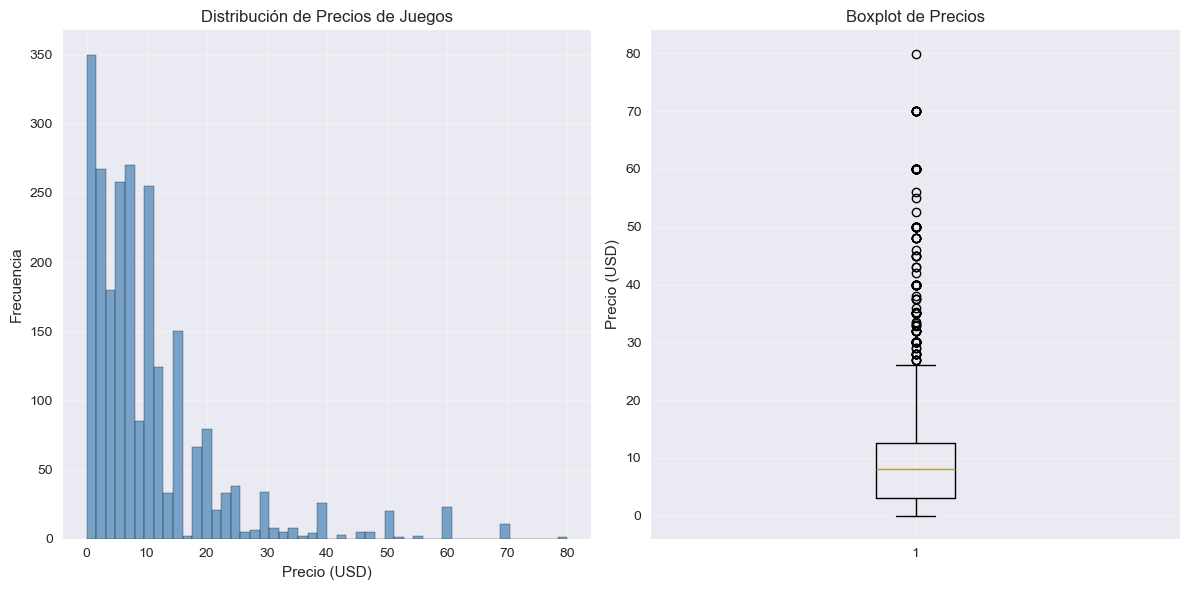

In [217]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['price'].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribución de Precios de Juegos')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['price'].dropna())
plt.title('Boxplot de Precios')
plt.ylabel('Precio (USD)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Estadísticas de precios

In [218]:
print(f"Precio promedio: ${df['price'].mean():.2f}")
print(f"Precio mediano: ${df['price'].median():.2f}")
print(f"Precio mínimo: ${df['price'].min():.2f}")
print(f"Precio máximo: ${df['price'].max():.2f}")
print(f"Desviación estándar: ${df['price'].std():.2f}")

Precio promedio: $10.51
Precio mediano: $7.99
Precio mínimo: $0.00
Precio máximo: $79.99
Desviación estándar: $11.34


### Juegos gratuitos vs pagos

In [219]:
juegos_gratuitos = (df['price'] == 0).sum()
juegos_pagos = (df['price'] > 0).sum()
total_juegos = len(df)

print(f"\nJuegos gratuitos: {juegos_gratuitos} ({juegos_gratuitos/total_juegos*100:.1f}%)")
print(f"Juegos de pago: {juegos_pagos} ({juegos_pagos/total_juegos*100:.1f}%)")


Juegos gratuitos: 169 (7.1%)
Juegos de pago: 2211 (92.9%)


### Análisis de Calificaciones, me gusta y Reviews

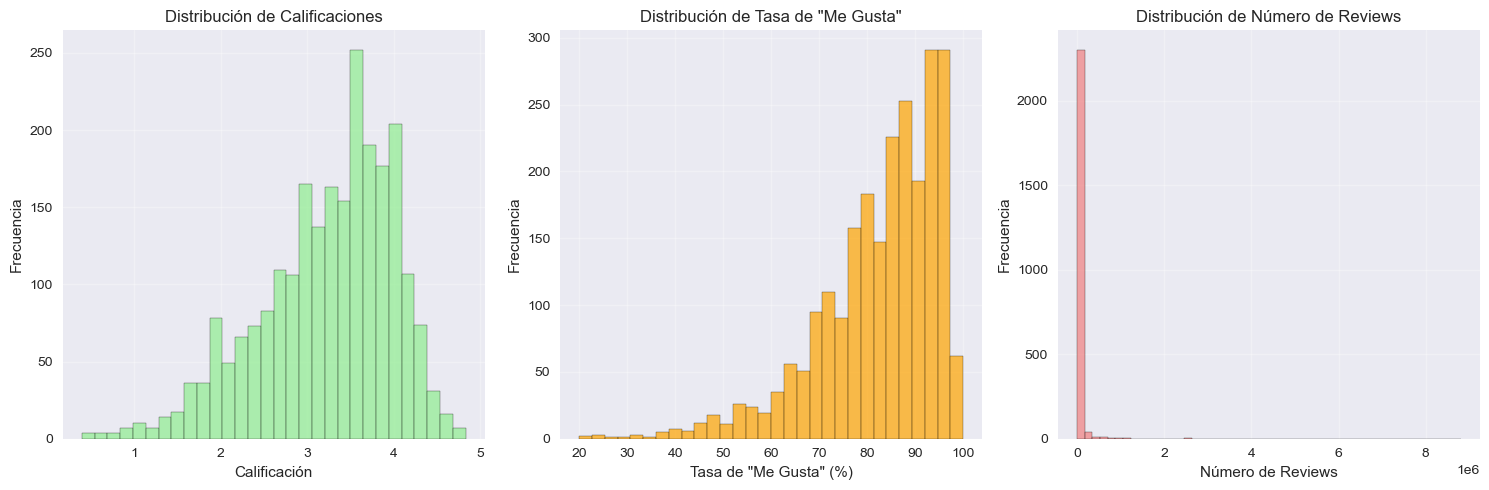

In [220]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['rating'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['reviews_like_rate'].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución de Tasa de "Me Gusta"')
plt.xlabel('Tasa de "Me Gusta" (%)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(df['all_reviews_number'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de correlación entre rating y reviews

In [221]:
print(f"Calificación promedio: {df['rating'].mean():.2f}")
print(f"Tasa de 'me gusta' promedio: {df['reviews_like_rate'].mean():.2f}%")
print(f"Número promedio de reviews: {df['all_reviews_number'].mean():.0f}")

corr_rating_like = df['rating'].corr(df['reviews_like_rate'])
print(f"\nCorrelación entre calificación y tasa de 'me gusta': {corr_rating_like:.3f}")

Calificación promedio: 3.23
Tasa de 'me gusta' promedio: 82.41%
Número promedio de reviews: 31615

Correlación entre calificación y tasa de 'me gusta': 0.534


### Análisis de Desarrolladores
Top 10 de los desarrolladores o empresa con mas titulos presentes en el dataset.

In [222]:
top_developers = df['developer'].value_counts().head(10)
print(top_developers)

developer
Valve                         17
Arc System Works              16
CAPCOM Co., Ltd.              12
CREATIVE ASSEMBLY             11
Ubisoft Montreal              10
Square Enix                   10
Paradox Development Studio    10
id Software                    9
KONAMI                         8
Wales Interactive              8
Name: count, dtype: int64


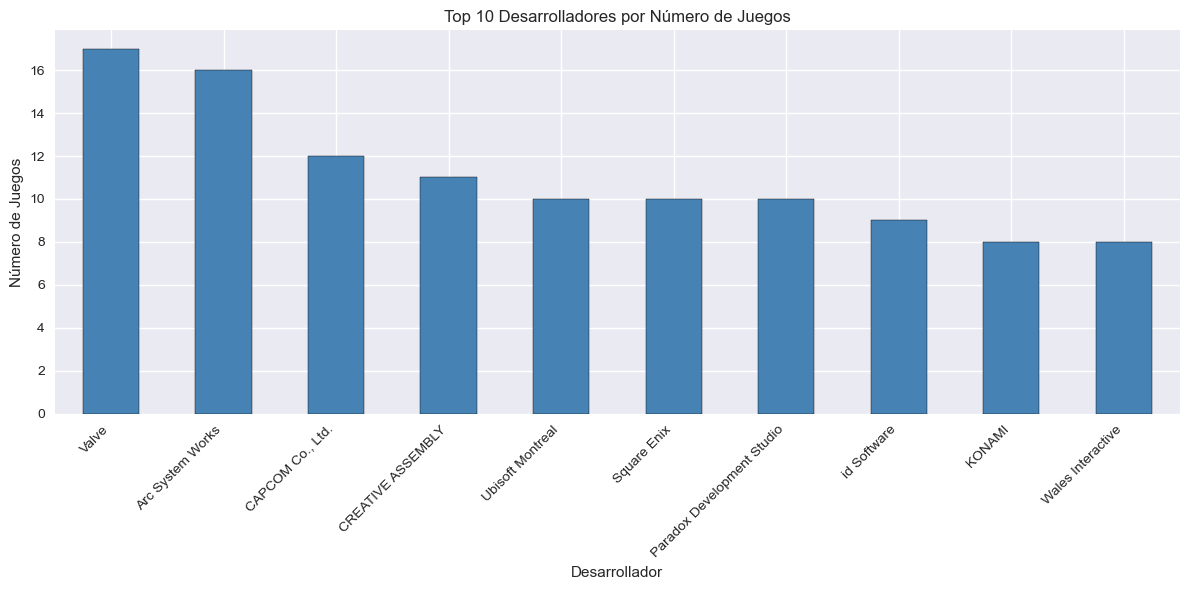

In [223]:
plt.figure(figsize=(12, 6))
top_developers.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Desarrolladores por Número de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de géneros más populares.

In [224]:
all_tags = []
for tags in df['user_defined_tags'].dropna():
    all_tags.extend(tags.split(', '))

tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(15)

print("Top 15 géneros/tags más populares:")
for tag, count in top_tags:
    percentage = (count / len(df)) * 100
    print(f"{tag}: {count} juegos ({percentage:.1f}%)")

Top 15 géneros/tags más populares:
Simulation: 736 juegos (30.9%)
Action: 730 juegos (30.7%)
Adventure: 522 juegos (21.9%)
RPG: 437 juegos (18.4%)
Strategy: 353 juegos (14.8%)
2D: 308 juegos (12.9%)
Horror: 299 juegos (12.6%)
FPS: 246 juegos (10.3%)
Survival: 237 juegos (10.0%)
Open World: 236 juegos (9.9%)
Puzzle: 221 juegos (9.3%)
Management: 201 juegos (8.4%)
Early Access: 199 juegos (8.4%)
Roguelike: 177 juegos (7.4%)
Building: 176 juegos (7.4%)


### Visualización de top géneros

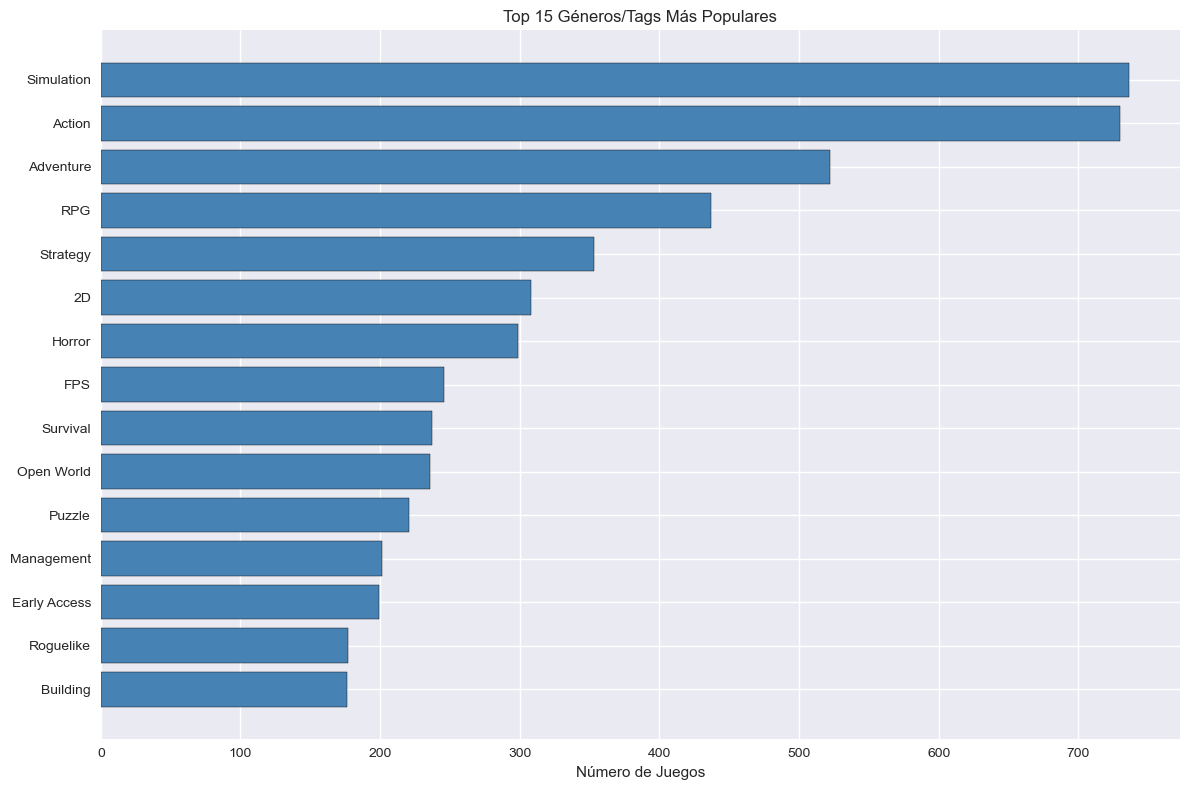

In [225]:
plt.figure(figsize=(12, 8))
tags, counts = zip(*top_tags)
plt.barh(range(len(tags)), counts, color='steelblue', edgecolor='black')
plt.yticks(range(len(tags)), tags)
plt.xlabel('Número de Juegos')
plt.title('Top 15 Géneros/Tags Más Populares')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Análisis de sistemas operativos soportados

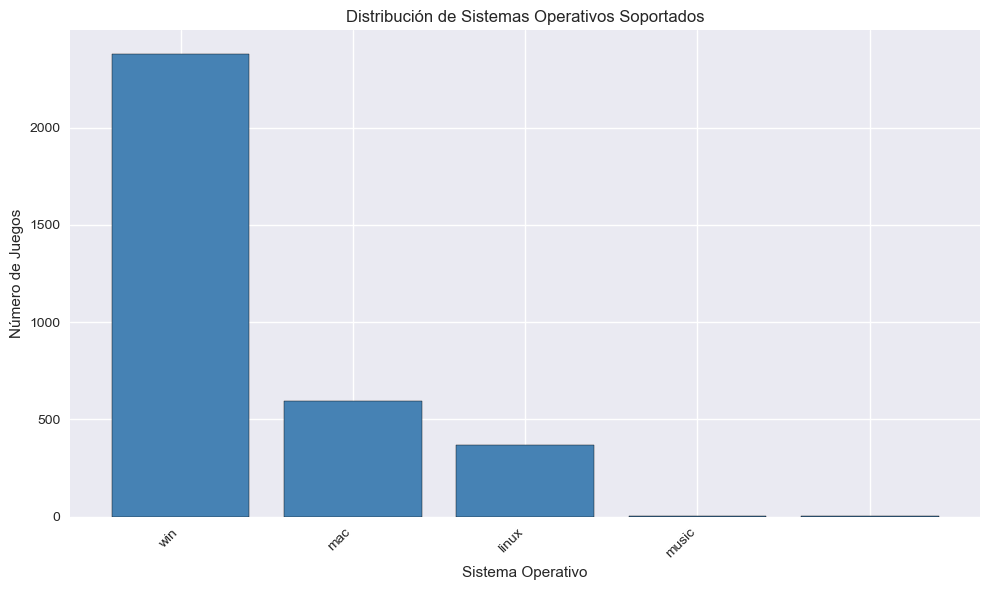

In [226]:
plt.figure(figsize=(10, 6))

os_counts = Counter()
for os_list in df['supported_os'].dropna():
    os_counts.update(os_list.split(', '))

os_names, os_counts_list = zip(*os_counts.most_common())
plt.bar(os_names, os_counts_list, color='steelblue', edgecolor='black')
plt.title('Distribución de Sistemas Operativos Soportados')
plt.xlabel('Sistema Operativo')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de Fechas de Lanzamiento

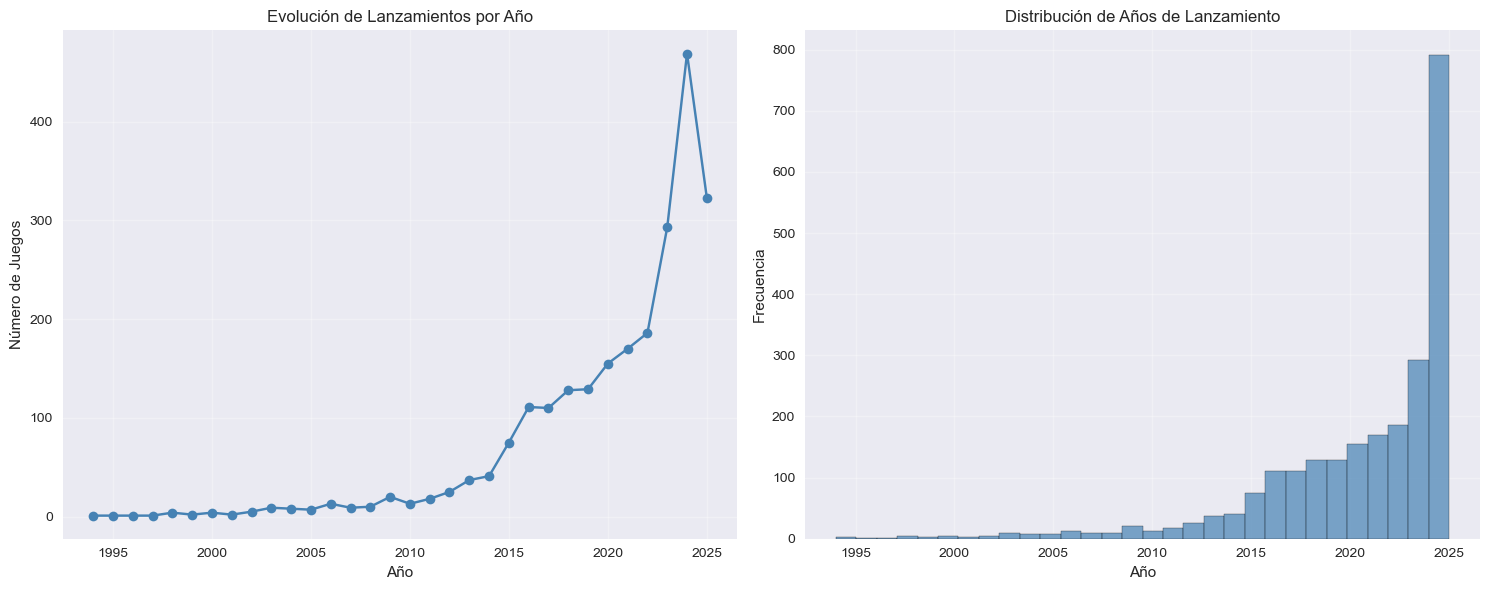

In [227]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o', color='steelblue')
plt.title('Evolución de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['release_year'].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de Duración y Descargas

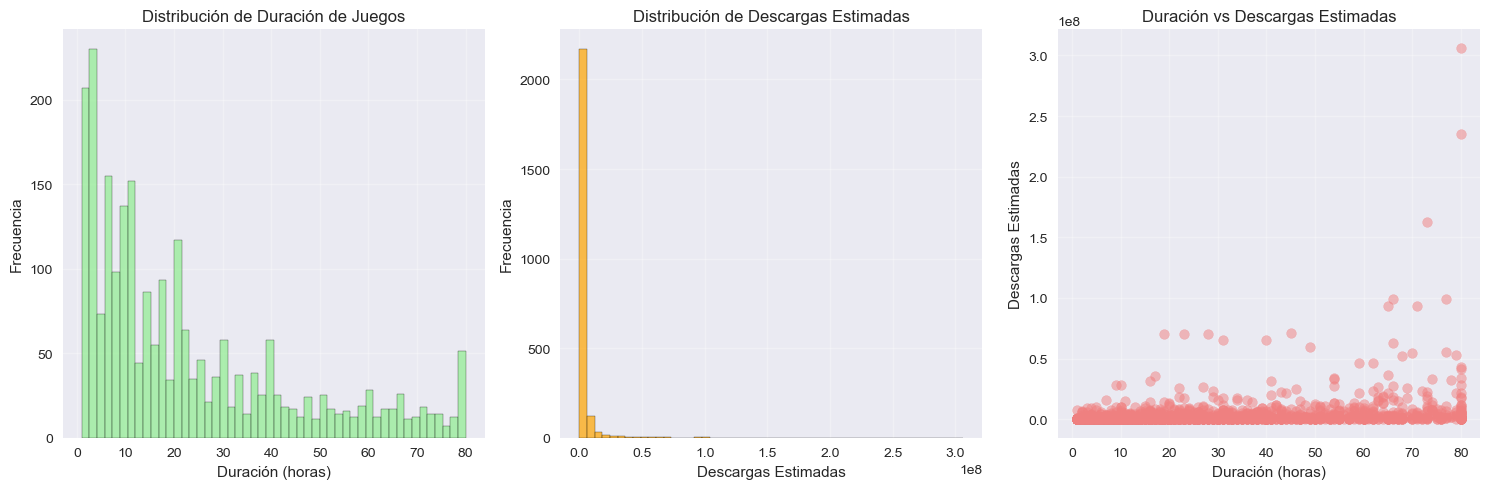

In [228]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['length'].dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribución de Duración de Juegos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['estimated_downloads'].dropna(), bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución de Descargas Estimadas')
plt.xlabel('Descargas Estimadas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(df['length'], df['estimated_downloads'], alpha=0.5, color='lightcoral')
plt.title('Duración vs Descargas Estimadas')
plt.xlabel('Duración (horas)')
plt.ylabel('Descargas Estimadas')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Estadísticas de duración y descargas

In [229]:
print(f"Duración promedio: {df['length'].mean():.1f} horas")
print(f"Duración mediana: {df['length'].median():.1f} horas")
print(f"Descargas promedio: {df['estimated_downloads'].mean():.0f}")
print(f"Descargas mediana: {df['estimated_downloads'].median():.0f}")

Duración promedio: 23.0 horas
Duración mediana: 16.0 horas
Descargas promedio: 2523007
Descargas mediana: 217150


### Correlación entre duración y descargas

In [230]:
corr_length_downloads = df['length'].corr(df['estimated_downloads'])
print(f"\nCorrelación entre duración y descargas: {corr_length_downloads:.3f}")


Correlación entre duración y descargas: 0.276


---

 ## Análisis de Relaciones entre Variables

 ### Matriz de Correlación

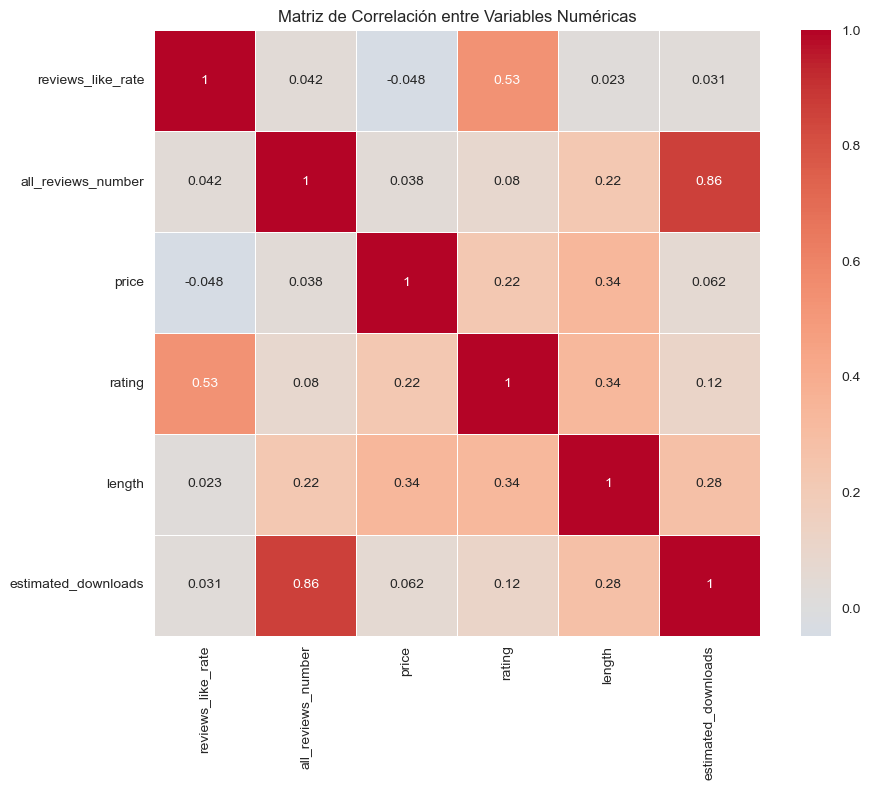

In [231]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

### Análisis de Precio vs Calificación

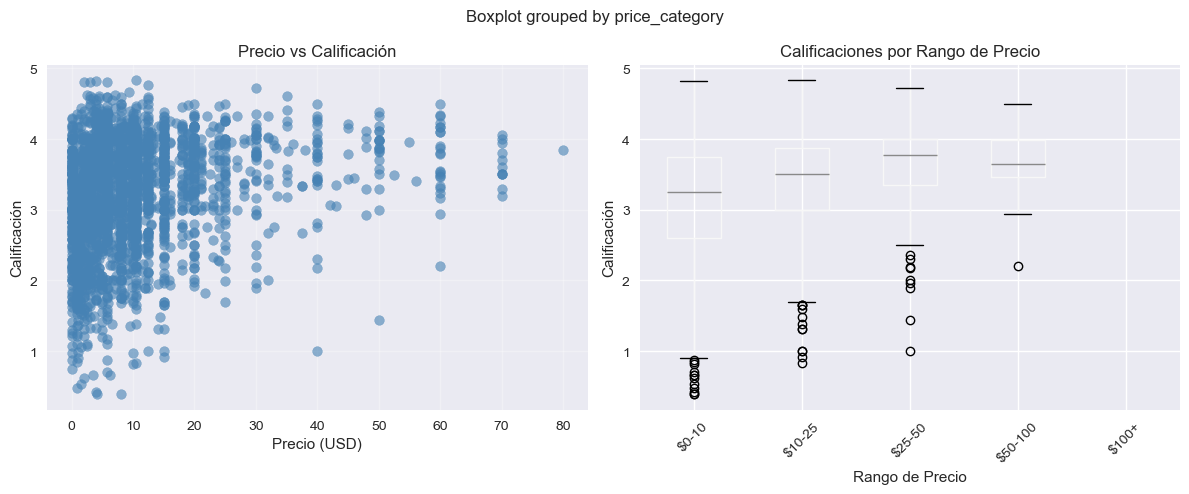

In [232]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['price'], df['rating'], alpha=0.6, color='steelblue')
plt.title('Precio vs Calificación')
plt.xlabel('Precio (USD)')
plt.ylabel('Calificación')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df['price_category'] = pd.cut(df['price'], bins=[0, 10, 25, 50, 100, float('inf')], 
                              labels=['$0-10', '$10-25', '$25-50', '$50-100', '$100+'])
df.boxplot(column='rating', by='price_category', ax=plt.gca())
plt.title('Calificaciones por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Calificación')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

## Outliers

### Outlier analyzer

In [233]:
class OutlierAnalyzer:
    def __init__(self, data, target_column):
        self.data = data.copy()
        self.target = target_column
        self.outliers_results = {}
    
    def basic_statistics(self):
        target_data = self.data[self.target]
        
        stats_dict = {
            'count': len(target_data),
            'mean': target_data.mean(),
            'median': target_data.median(),
            'std': target_data.std(),
            'min': target_data.min(),
            'max': target_data.max(),
            'q1': target_data.quantile(0.25),
            'q3': target_data.quantile(0.75),
            'iqr': target_data.quantile(0.75) - target_data.quantile(0.25),
            'skewness': scipy_stats.skew(target_data),
            'kurtosis': scipy_stats.kurtosis(target_data)
        }
        
        return stats_dict
    
    def iqr_method(self, k=1.5):
        target_data = self.data[self.target]
        
        Q1 = target_data.quantile(0.25)
        Q3 = target_data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        outliers_mask = (target_data < lower_bound) | (target_data > upper_bound)
        outliers = self.data[outliers_mask]
        
        self.outliers_results['IQR'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'method_params': {'k': k}
        }
        
        print(f"\nMétodo IQR (k={k}):")
        print(f"Límite inferior: {lower_bound:.2f}")
        print(f"Límite superior: {upper_bound:.2f}")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def zscore_method(self, threshold=3):
        target_data = self.data[self.target]
        z_scores = np.abs(scipy_stats.zscore(target_data))
        
        outliers_mask = z_scores > threshold
        outliers = self.data[outliers_mask]
        
        self.outliers_results['ZScore'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'threshold': threshold,
            'z_scores': z_scores,
            'method_params': {'threshold': threshold}
        }
        
        print(f"\nMétodo Z-Score (threshold={threshold}):")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def modified_zscore_method(self, threshold=3.5):
        target_data = self.data[self.target]
        
        median = np.median(target_data)
        mad = np.median(np.abs(target_data - median))
        modified_z_scores = 0.6745 * (target_data - median) / mad
        
        outliers_mask = np.abs(modified_z_scores) > threshold
        outliers = self.data[outliers_mask]
        
        self.outliers_results['Modified_ZScore'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'threshold': threshold,
            'modified_z_scores': modified_z_scores,
            'method_params': {'threshold': threshold}
        }
        
        print(f"\nMétodo Z-Score modificado (threshold={threshold}):")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def isolation_forest_method(self, contamination=0.1):
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns.tolist()
        
        exclude_cols = ['estimated_downloads']
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
        
        X = self.data[numeric_cols].fillna(self.data[numeric_cols].median())
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outliers_pred = iso_forest.fit_predict(X_scaled)
        
        outliers_mask = outliers_pred == -1
        outliers = self.data[outliers_mask]
        
        self.outliers_results['Isolation_Forest'] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(self.data)) * 100,
            'contamination': contamination,
            'features_used': numeric_cols,
            'method_params': {'contamination': contamination}
        }
        
        print(f"\nMétodo Isolation Forest (contamination={contamination}):")
        print(f"Características usadas: {len(numeric_cols)}")
        print(f"Outliers detectados: {len(outliers)} ({(len(outliers)/len(self.data)*100):.2f}%)")
        
        return outliers
    
    def visualize_outliers(self, figsize=(20, 15)):
        fig, axes = plt.subplots(3, 3, figsize=figsize)
        fig.suptitle(f'Análisis de Outliers - {self.target}', fontsize=16, fontweight='bold')
        
        target_data = self.data[self.target]
        
        axes[0,0].hist(target_data, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        axes[0,0].axvline(target_data.mean(), color='red', linestyle='--', label=f'Media: {target_data.mean():.2f}')
        axes[0,0].axvline(target_data.median(), color='green', linestyle='--', label=f'Mediana: {target_data.median():.2f}')
        axes[0,0].set_title('Distribución')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        box_plot = axes[0,1].boxplot(target_data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('steelblue')
        axes[0,1].set_title('Box Plot')
        axes[0,1].grid(True, alpha=0.3)
        
        scipy_stats.probplot(target_data, dist="norm", plot=axes[0,2])
        axes[0,2].set_title('Q-Q Plot (Normalidad)')
        axes[0,2].grid(True, alpha=0.3)
        
        if 'IQR' in self.outliers_results:
            iqr_outliers = self.outliers_results['IQR']['outliers'][self.target]
            axes[1,0].scatter(range(len(target_data)), target_data, alpha=0.6, label='Normal', s=20)
            if len(iqr_outliers) > 0:
                outlier_indices = iqr_outliers.index
                axes[1,0].scatter(outlier_indices, iqr_outliers, color='red', edgecolor='black', label=f'Outliers IQR ({len(iqr_outliers)})', s=50)
            axes[1,0].set_title('Outliers - Método IQR')
            axes[1,0].legend()
            axes[1,0].grid(True, alpha=0.3)
        
        if 'ZScore' in self.outliers_results:
            z_scores = self.outliers_results['ZScore']['z_scores']
            axes[1,1].scatter(range(len(z_scores)), z_scores, alpha=0.6, s=20)
            axes[1,1].axhline(y=3, color='red', linestyle='--', label='Threshold (±3)')
            axes[1,1].axhline(y=-3, color='red', linestyle='--')
            axes[1,1].set_title('Z-Scores')
            axes[1,1].legend()
            axes[1,1].grid(True, alpha=0.3)
        
        if 'Modified_ZScore' in self.outliers_results:
            mod_z_scores = self.outliers_results['Modified_ZScore']['modified_z_scores']
            axes[1,2].scatter(range(len(mod_z_scores)), mod_z_scores, alpha=0.6, s=20, color='purple', edgecolor='black')
            axes[1,2].axhline(y=3.5, color='red', linestyle='--', label='Threshold (±3.5)')
            axes[1,2].axhline(y=-3.5, color='red', linestyle='--')
            axes[1,2].set_title('Modified Z-Scores')
            axes[1,2].legend()
            axes[1,2].grid(True, alpha=0.3)
        
        methods = []
        counts = []
        colors = ['blue', 'orange', 'green', 'red']
        
        for method, results in self.outliers_results.items():
            methods.append(method)
            counts.append(results['count'])
        
        bars = axes[2,0].bar(methods, counts, color=colors[:len(methods)], edgecolor='black')
        axes[2,0].set_title('Outliers por Método')
        axes[2,0].tick_params(axis='x', rotation=45)
        
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            axes[2,0].text(bar.get_x() + bar.get_width()/2., height,
                          f'{count}', ha='center', va='bottom')
        
        sorted_data = np.sort(target_data)
        y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        axes[2,1].plot(sorted_data, y, marker='o', markersize=3)
        axes[2,1].set_title('Función de Distribución Acumulativa')
        axes[2,1].grid(True, alpha=0.3)
        
        if 'rating' in self.data.columns:
            axes[2,2].scatter(self.data['rating'], target_data, alpha=0.6, s=20)
            axes[2,2].set_xlabel('Rating')
            axes[2,2].set_ylabel(self.target)
            axes[2,2].set_title(f'{self.target} vs Rating')
            axes[2,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    def outliers_summary(self):
        print("Detalles de los outliers detectados")
        
        for method, results in self.outliers_results.items():
            print(f"\nMétodo: {method}")
            print("-" * 50)
            print(f"Outliers detectados: {results['count']}")
            print(f"Porcentaje del total: {results['percentage']:.2f}%")
            
            if results['count'] > 0:
                outliers_data = results['outliers']
                target_outliers = outliers_data[self.target]
                
                print(f"Valor mínimo outlier: {target_outliers.min():.2f}")
                print(f"Valor máximo outlier: {target_outliers.max():.2f}")
                print(f"Media de outliers: {target_outliers.mean():.2f}")
                
                print(f"\nEjemplos de juegos outliers:")
                sample_size = min(5, len(outliers_data))
                sample_outliers = outliers_data.nlargest(sample_size, self.target)
                
                for idx, row in sample_outliers.iterrows():
                    print(f"  • {row['game_name']}: {row[self.target]:.1f}% ({row['all_reviews_number']} reviews)")
            print("=" * 50)
    
    def export_outliers(self, filename_prefix="outliers", min_methods=2):
        outlier_counts = {}
        outlier_details = {}
        
        for method, results in self.outliers_results.items():
            if results['count'] > 0:
                outliers_data = results['outliers']
                
                for idx, row in outliers_data.iterrows():
                    game_name = row['game_name']
                    target_value = row[self.target]
                    
                    if game_name not in outlier_counts:
                        outlier_counts[game_name] = 0
                        outlier_details[game_name] = {
                            'game_name': game_name,
                            'target_value': target_value,
                            'methods_detected': [],
                            'all_reviews_number': row.get('all_reviews_number', 'N/A'),
                            'price': row.get('price', 'N/A'),
                            'rating': row.get('rating', 'N/A'),
                            'developer': row.get('developer', 'N/A')
                        }
                    
                    outlier_counts[game_name] += 1
                    outlier_details[game_name]['methods_detected'].append(method)
        
        reliable_outliers = []
        outlier_game_names = set()

        for game_name, count in outlier_counts.items():
            if count >= min_methods:
                outlier_info = outlier_details[game_name]
                outlier_info['methods_count'] = count
                outlier_info['methods_list'] = ', '.join(outlier_info['methods_detected'])
                reliable_outliers.append(outlier_info)
                outlier_game_names.add(game_name)
        
        reliable_outliers.sort(key=lambda x: x['methods_count'], reverse=True)
        
        df_reliable = pd.DataFrame(reliable_outliers)
        
        filename = f"{filename_prefix}_restricted_{min_methods}_methods.csv"
        df_reliable.to_csv(filename, index=False)
        
        print(f"\nExportación de outliers confiables")
        print(f"Archivo exportado: {filename}")
        print(f"Outliers detectados por {min_methods} o más métodos: {len(reliable_outliers)}")
        print(f"Total de juegos analizados: {len(self.data)}")
        print(f"Porcentaje de outliers confiables: {(len(reliable_outliers)/len(self.data)*100):.2f}%")
        
        method_counts = {}
        for outlier in reliable_outliers:
            count = outlier['methods_count']
            method_counts[count] = method_counts.get(count, 0) + 1
        
        clean_data = self.data[~self.data['game_name'].isin(outlier_game_names)].copy()
        clean_filename = "ventas_juegos_steam_clean.csv"
        clean_data.to_csv(clean_filename, index=False)

Dataset cargado: 2380 juegos
Analizando outliers para la columna reviews_like_rate

Método IQR (k=2.0):
Límite inferior: 44.00
Límite superior: 124.00
Outliers detectados: 29 (1.22%)

Método Z-Score (threshold=3):
Outliers detectados: 34 (1.43%)

Método Z-Score modificado (threshold=3.5):
Outliers detectados: 29 (1.22%)

Método Isolation Forest (contamination=0.1):
Características usadas: 8
Outliers detectados: 238 (10.00%)


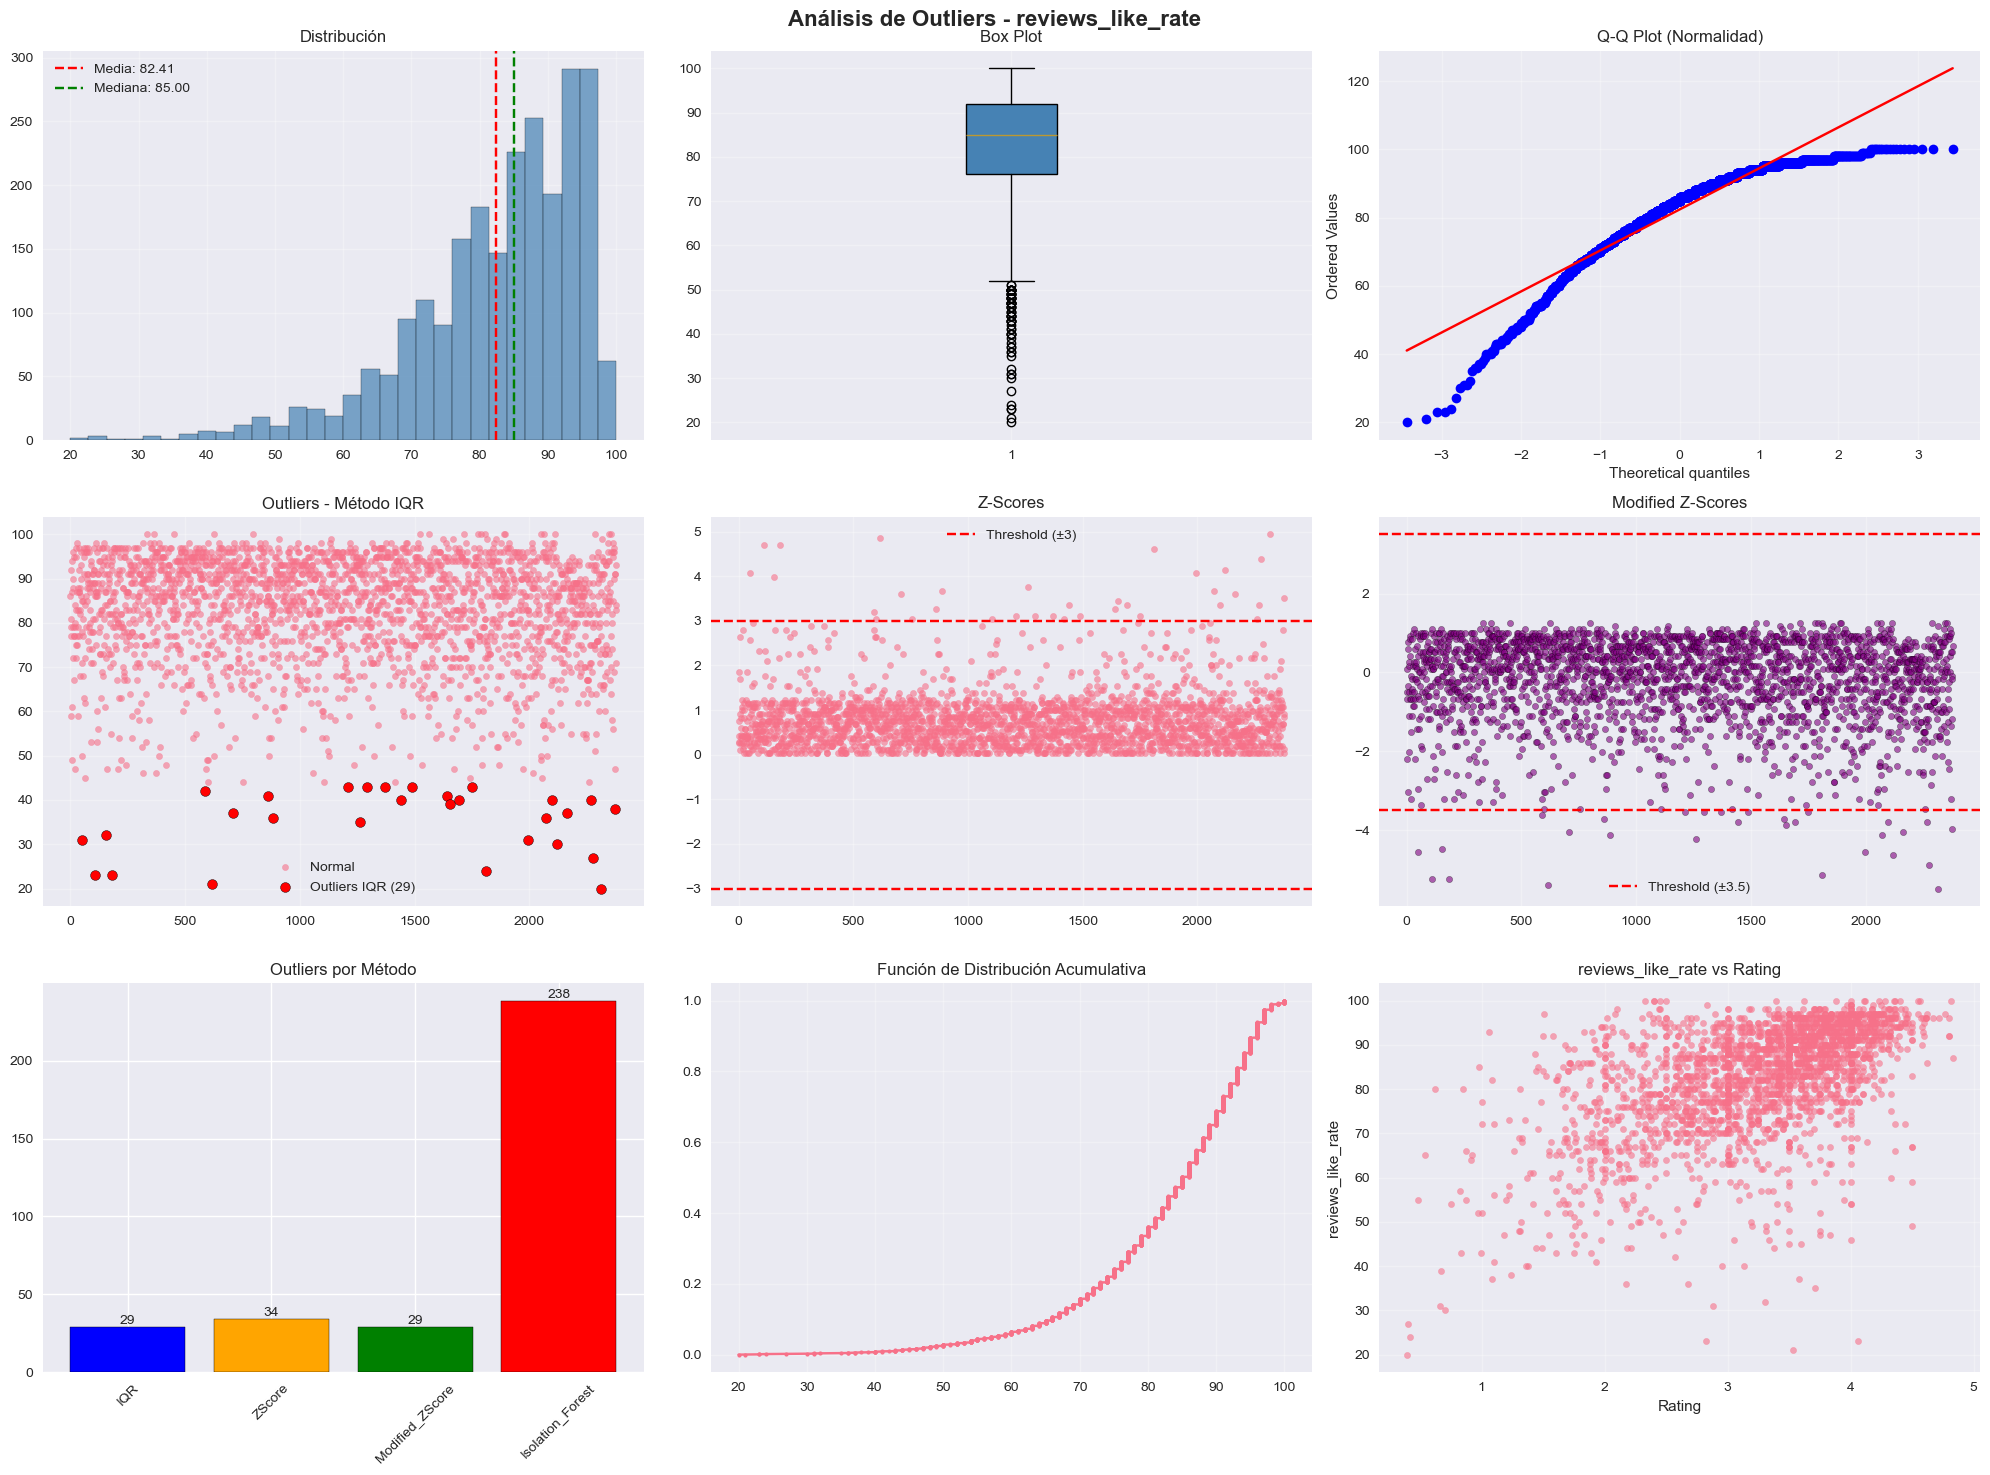

Detalles de los outliers detectados

Método: IQR
--------------------------------------------------
Outliers detectados: 29
Porcentaje del total: 1.22%
Valor mínimo outlier: 20.00
Valor máximo outlier: 43.00
Media de outliers: 35.14

Ejemplos de juegos outliers:
  • S.T.A.L.K.E.R.: Clear Sky - Enhanced Edition: 43.0% (867 reviews)
  • Youtubers Life 3 - Stream Together!: 43.0% (244 reviews)
  • iBLiS: 43.0% (558 reviews)
  • Garage Flipper: 43.0% (44 reviews)
  • SKYHILL: Black Mist: 43.0% (176 reviews)

Método: ZScore
--------------------------------------------------
Outliers detectados: 34
Porcentaje del total: 1.43%
Valor mínimo outlier: 20.00
Valor máximo outlier: 44.00
Media de outliers: 36.44

Ejemplos de juegos outliers:
  • The Walking Dead: Destinies: 44.0% (467 reviews)
  • Sonic the Hedgehog 4 - Episode I: 44.0% (2289 reviews)
  • Demolish & Build 3: 44.0% (176 reviews)
  • MudRunner VR: 44.0% (81 reviews)
  • Nifa's First Mission: 44.0% (27 reviews)

Método: Modified_ZScor

In [234]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

analyzer = OutlierAnalyzer(data=df, target_column='reviews_like_rate')

print(f"Dataset cargado: {len(df)} juegos")
print(f"Analizando outliers para la columna {analyzer.target}")

stats_outliers = analyzer.basic_statistics()
iqr_outliers = analyzer.iqr_method(k=2.0)
zscore_outliers = analyzer.zscore_method(threshold=3)
mod_zscore_outliers = analyzer.modified_zscore_method(threshold=3.5)
iso_outliers = analyzer.isolation_forest_method(contamination=0.1)

analyzer.visualize_outliers()

analyzer.outliers_summary()

analyzer.export_outliers('outliers_analysis', 1)
